## Qs 1-

In [55]:
import pandas as pd
import matplotlib.pyplot as plt
df=pd.read_csv('startup_funding.csv')
df

,SNo,Date,StartupName,IndustryVertical,SubVertical,CityLocation,InvestorsName,InvestmentType,AmountInUSD,Remarks
0,0,01/08/2017,TouchKin,Technology,Predictive Care Platform,Bangalore,Kae Capital,Private Equity,"1,300,000",NaN
1,1,02/08/2017,Ethinos,Technology,Digital Marketing Agency,Mumbai,Triton Investment Advisors,Private Equity,NaN,NaN
2,2,02/08/2017,Leverage Edu,Consumer Internet,Online platform for Higher Education Services,New Delhi,"Kashyap Deorah, Anand Sankeshwar, Deepak Jain,...",Seed Funding,NaN,NaN
3,3,02/08/2017,Zepo,Consumer Internet,DIY Ecommerce platform,Mumbai,"Kunal Shah, LetsVenture, Anupam Mittal, Hetal ...",Seed Funding,"500,000",NaN
4,4,02/08/2017,Click2Clinic,Consumer Internet,healthcare service aggregator,Hyderabad,"Narottam Thudi, Shireesh Palle",Seed Funding,"850,000",NaN
...,...,...,...,...,...,...,...,...,...,...
2367,2367,29/01/2015,Printvenue,NaN,NaN,NaN,Asia Pacific Internet Group,Private Equity,"4,500,000",NaN
2368,2368,29/01/2015,Graphene,NaN,NaN,NaN,KARSEMVEN Fund,Private Equity,"825,000",Govt backed VC Fund
2369,2369,30/01/2015,Mad Street Den,NaN,NaN,NaN,"Exfinity Fund, GrowX Ventures.",Private Equity,"1,500,000",NaN
2370,2370,30/01/2015,Simplotel,NaN,NaN,NaN,MakeMyTrip,Private Equity,NaN,"Strategic Funding, Minority stake"


CityLocation
Bangalore                 627
Mumbai                    446
New Delhi                 385
Gurgaon                   240
Noida                      78
Bangalore / SFO             2
New Delhi / US              2
Bangalore/ Bangkok          2
SFO / Bangalore             1
Seattle / Bangalore         1
bangalore                   1
Mumbai / UK                 1
Bangalore / Palo Alto       1
Mumbai / NY                 1
Noida / Singapore           1
Bangalore / San Mateo       1
Gurgaon / SFO               1
Bangalore / USA             1
New Delhi/ Houston          1
Mumbai / Global             1
New Delhi / California      1
Name: count, dtype: int64


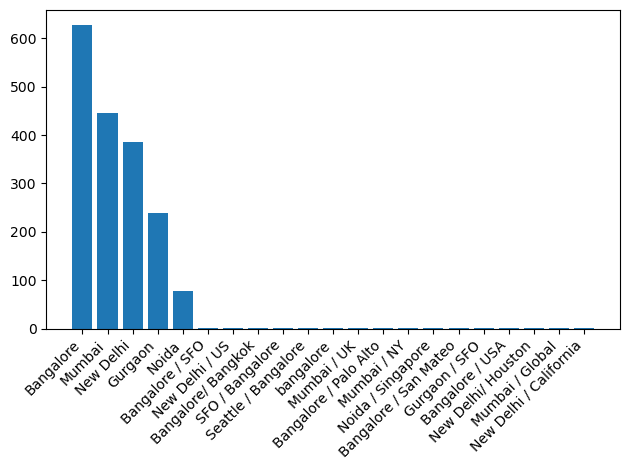

In [15]:
df['CityLocation']=df['CityLocation'].replace('Delhi','New Delhi')
df_filtered=df[df['CityLocation'].str.contains('Bangalore|Mumbai|New Delhi|Gurgaon|Noida',case=False,na=False)]
df_filtered

top_cities=df_filtered['CityLocation'].value_counts()
print(top_cities)

plt.bar(top_cities.index,top_cities.values)
plt.xticks(rotation=45, ha='right') # align the tick labels to the right avoid them cutting each other

plt.tight_layout()  ## automatic adujust the layout and prevent overlapping
plt.show()

## QS - 2 =top 5 investors

InvestorsName
Ratan Tata                  24
Indian Angel Network        24
Kalaari Capital             16
Group of Angel Investors    15
Sequoia Capital             14
RoundGlass Partners         10
Brand Capital               10
Accel Partners               9
SAIF Partners                9
Info Edge (India) Ltd        8
Name: count, dtype: int64


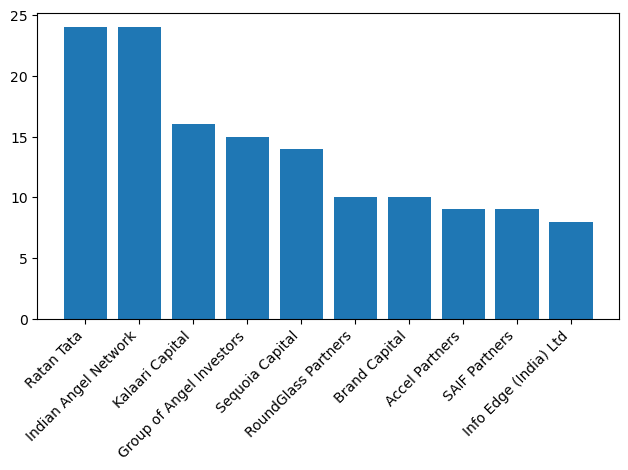

In [13]:
df_filtered=df[~df['InvestorsName'].str.contains('Undisclosed Investors|Undisclosed Investor|Undisclosed',case=False,na=False)]
top_investors=df_filtered['InvestorsName'].value_counts().head(10)
print(top_investors)

plt.bar(top_investors.index,top_investors.values)
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

## QS 3= find top investors who invested in multiple unique startups

                 InvestorsName  UniqueStartups
1297                Ratan Tata              24
705       Indian Angel Network              24
817            Kalaari Capital              16
573   Group of Angel Investors              14
1451           Sequoia Capital              14
1350       RoundGlass Partners              10
304              Brand Capital              10
1361             SAIF Partners               9
49              Accel Partners               9
1634              Tiger Global               7
1834         YouWeCan Ventures               7
1722          Unitus Seed Fund               7
1679          Trifecta Capital               6
726      Info Edge (India) Ltd               6
1097    Nexus Venture Partners               6


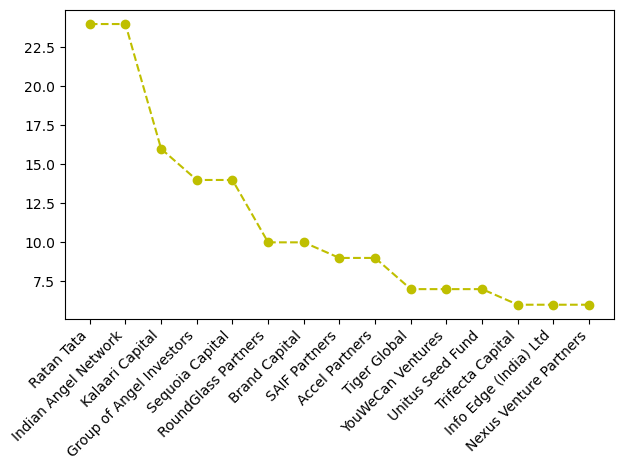

In [20]:
unique_investments = df[['InvestorsName', 'StartupName']].drop_duplicates()

# Now, group by 'InvestorsName' to count how many different startups each investor has invested in
investor_startup_counts = unique_investments.groupby('InvestorsName').size().reset_index(name='UniqueStartups')
investor_startup_counts=investor_startup_counts[~investor_startup_counts['InvestorsName'].str.contains('Undisclosed Investors|Undisclosed Investor|Undisclosed',case=False,na=False)]

# Sort by 'UniqueStartups' in descending order to get top investors
top_investors = investor_startup_counts.sort_values(by='UniqueStartups', ascending=False).head(15)

# Display the top 5 investors
print(top_investors)

plt.plot(top_investors.InvestorsName,top_investors.UniqueStartups,'y--',marker='o')
plt.xticks(rotation=45,ha='right')
plt.tight_layout()
plt.show()

## Qs 4= top investors for seed funding and crowd funding

In [38]:
'''df['StartupName'] = df['StartupName'].replace({
    'Olacabs': 'Ola', 
    'Ola Cabs': 'Ola', 
    'Flipkart.com': 'Flipkart',
    'Paytm Marketplace': 'Paytm'
})'''
df['AmountInUSD'] = df['AmountInUSD'].astype(str).str.replace(',', '', regex=True).str.strip()

# Step 2: Convert to numeric, coercing errors to NaN
df['AmountInUSD'] = pd.to_numeric(df['AmountInUSD'], errors='coerce')

df['AmountInUSD']=df['AmountInUSD'].fillna(0)

top5_st=df.groupby('StartupName')['AmountInUSD'].sum().reset_index()
top5_st=top5_st.sort_values(by='AmountInUSD', ascending=False).reset_index(drop=True).head(20)
print(top5_st)

df['StartupName'] = df['StartupName'].replace({
    'Olacabs': 'Ola', 
    'Ola Cabs': 'Ola', 
    'Flipkart.com': 'Flipkart',
    'Paytm Marketplace': 'Paytm'
}) 
print(top5_st)

startups=df.groupby('StartupName').size().reset_index(name='count')
startups=startups.sort_values(by='count',ascending=False).reset_index(drop=True).head(20)
startups



     StartupName   AmountInUSD
0          Paytm  2.340000e+09
1       Flipkart  2.259700e+09
2            Ola  1.899500e+09
3       Snapdeal  7.000000e+08
4      Oyo Rooms  3.500000e+08
5          Quikr  2.300000e+08
6      Delhivery  2.150000e+08
7      Foodpanda  2.100000e+08
8      BigBasket  2.070000e+08
9     MakeMyTrip  1.800000e+08
10          Hike  1.750000e+08
11        Swiggy  1.705000e+08
12       Grofers  1.650000e+08
13        Byju’s  1.600000e+08
14      CarTrade  1.450000e+08
15    FreeCharge  1.370000e+08
16  Ecom Express  1.370000e+08
17     Pepperfry  1.313000e+08
18        Rivigo  1.200000e+08
19     Shopclues  1.077000e+08
     StartupName   AmountInUSD
0          Paytm  2.340000e+09
1       Flipkart  2.259700e+09
2            Ola  1.899500e+09
3       Snapdeal  7.000000e+08
4      Oyo Rooms  3.500000e+08
5          Quikr  2.300000e+08
6      Delhivery  2.150000e+08
7      Foodpanda  2.100000e+08
8      BigBasket  2.070000e+08
9     MakeMyTrip  1.800000e+08
10      

,StartupName,count
0,Ola,9
1,Swiggy,7
2,UrbanClap,6
3,Paytm,6
4,Medinfi,5
5,Flipkart,5
6,Jugnoo,5
7,NoBroker,5
8,Simplilearn,4
9,Capital Float,4


In [39]:
df

,SNo,Date,StartupName,IndustryVertical,SubVertical,CityLocation,InvestorsName,InvestmentType,AmountInUSD,Remarks
0,0,01/08/2017,TouchKin,Technology,Predictive Care Platform,Bangalore,Kae Capital,Private Equity,1300000.0,NaN
1,1,02/08/2017,Ethinos,Technology,Digital Marketing Agency,Mumbai,Triton Investment Advisors,Private Equity,0.0,NaN
2,2,02/08/2017,Leverage Edu,Consumer Internet,Online platform for Higher Education Services,New Delhi,"Kashyap Deorah, Anand Sankeshwar, Deepak Jain,...",Seed Funding,0.0,NaN
3,3,02/08/2017,Zepo,Consumer Internet,DIY Ecommerce platform,Mumbai,"Kunal Shah, LetsVenture, Anupam Mittal, Hetal ...",Seed Funding,500000.0,NaN
4,4,02/08/2017,Click2Clinic,Consumer Internet,healthcare service aggregator,Hyderabad,"Narottam Thudi, Shireesh Palle",Seed Funding,850000.0,NaN
...,...,...,...,...,...,...,...,...,...,...
2367,2367,29/01/2015,Printvenue,NaN,NaN,NaN,Asia Pacific Internet Group,Private Equity,4500000.0,NaN
2368,2368,29/01/2015,Graphene,NaN,NaN,NaN,KARSEMVEN Fund,Private Equity,825000.0,Govt backed VC Fund
2369,2369,30/01/2015,Mad Street Den,NaN,NaN,NaN,"Exfinity Fund, GrowX Ventures.",Private Equity,1500000.0,NaN
2370,2370,30/01/2015,Simplotel,NaN,NaN,NaN,MakeMyTrip,Private Equity,0.0,"Strategic Funding, Minority stake"


In [59]:
df['InvestmentType']=df['InvestmentType'].replace({'SeedFunding':'Seed Funding','Crowd funding':'Crowd Funding','PrivateEquity':'Private Equity'})
invst_type=df.groupby('InvestmentType').size().reset_index(name='count')
invst_type=invst_type.sort_values(by='count',ascending=False).reset_index(drop=True)
print(invst_type)
df_filtered=df[df['InvestmentType'].str.contains('Seed Funding|Crowd Funding',case=False,na=False)]
df_filtered=df_filtered[~df_filtered['InvestorsName'].str.contains('Undisclosed Investors|Undisclosed|Undisclosed investor',case=False,na=False)]
#seed_crowd_invstr=df_filtered.groupby(['InvestmentType','InvestorsName']).size().reset_index(name='count')
#seed_crowd_invstr=seed_crowd_invstr.sort_values(by='count',ascending=False).reset_index(drop=True).head(10)
seed_crowd_invstr=df_filtered['InvestorsName'].value_counts().head(10)
seed_crowd_invstr

   InvestmentType  count
0    Seed Funding   1301
1  Private Equity   1067
2   Crowd Funding      2
3    Debt Funding      1


InvestorsName
Indian Angel Network                                         23
Group of Angel Investors                                     15
YouWeCan Ventures                                             7
Ratan Tata                                                    6
Kalaari Capital                                               6
Hyderabad Angels (at Startup Heroes event)                    5
The Chennai Angels                                            5
Unitus Seed Fund                                              5
Multiple investors through Ten Minute Million competition     4
Idein Ventures                                                4
Name: count, dtype: int64

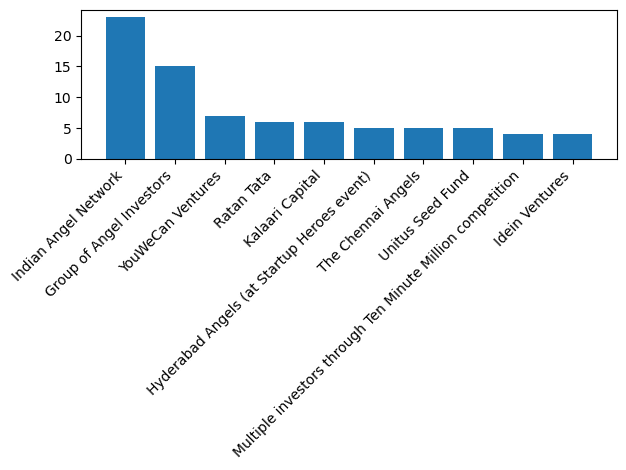

In [60]:
plt.bar(seed_crowd_invstr.index,seed_crowd_invstr.values)
plt.xticks(rotation=45,ha='right')
plt.tight_layout()
plt.show()